# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.0.3')
    requirements_generator.add_package('scipy', '1.9.0')
    requirements_generator.add_package('matplotlib','3.6.0')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
from pathlib import Path

#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_table_counts_inde_attr_by_chi2')
    manifest_genenerator.set_ait_description('データの妥当性を評価するため、CSV形式のデータセットについて、ラベルと各属性の独立性をカイ二乗統計量を用いて算出し、独立性の高い属性が含まれている場合、不要な属性(ラベルと関係性がなく判定に関与できない属性)を用いたデータを使っていないかを確認すること。確認対象はカテゴリ属性のみにすること。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_table_counts_inde_attr_by_chi2')
    manifest_genenerator.set_ait_version('0.2')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('Chi-Squared')
    manifest_genenerator.add_ait_keywords('recode count')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/A-2データ設計の十分性')
    inventory_requirement_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(name='Table_data', 
                                             type_='dataset', 
                                             description='分析対象の表データ(csv)\n1列目は属性名\n連続値カラムはAIT内部でカイ二乗検定の対象から自動的に除外する', 
                                             requirement=inventory_requirement_data)
    manifest_genenerator.add_ait_parameters(name='Target_attribute', 
                                            type_='str',  
                                            description='予測するラベル属性', 
                                            default_val='')
    manifest_genenerator.add_ait_parameters(name='Excluded_attributes', 
                                            type_='str',  
                                            description='分析対象外の属性の指定(カンマ区切りで複数指定可能)\n※指定しない場合はNoneを入力', 
                                            default_val='None')
    manifest_genenerator.add_ait_parameters(name='p-value', 
                                            type_='float',  
                                            description='カイ二乗統計量の閾値', 
                                            default_val='0.05')
    manifest_genenerator.add_ait_measures(name='IndependentAttrCount', 
                                          type_='int', 
                                          description='カイ二乗統計量を元に独立性の高い属性の数(抽出規則：カイ二乗統計量の計算結果 <= p-value)', 
                                          structure='single',
                                          min='0')
    manifest_genenerator.add_ait_resources(name='DistributionPlot', 
                                           type_='picture', 
                                           description='独立性の高い属性の分布プロット')
    manifest_genenerator.add_ait_downloads(name='AllAttrResult', 
                                           description='すべて属性のカイ二乗統計量の計算結果リスト')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='Table_data',
                                        value='data.csv')
    input_generator.set_ait_params(name='Target_attribute',
                                   value='Survived')
    input_generator.set_ait_params(name='Excluded_attributes',
                                   value='None')
    input_generator.set_ait_params(name='p-value',
                                   value='0.05')
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
@log(logger)
@measures(ait_output, 'IndependentAttrCount')
def calc_independent_attr_count(table_data_df, target_attribute, excluded_attributes, input_p_value) -> int:
    
    # Category attributes
    category_df = extract_categorical_attributes(table_data_df, target_attribute, excluded_attributes)
    
    # Label attribute to predict
    target_attribute_df = table_data_df[target_attribute]
    
    # data concat
    df = pd.concat([category_df, target_attribute_df], axis=1)
    
    # Counting highly independent attributes
    independent_attribute_count = 0
    rows = []
    
    print('\n        ************************************       \n')
    
    # chi-square statistic
    for column in df.columns:
        
        if column == target_attribute:
            continue
        
        stat, p, dof, expected = chi2_contingency(pd.crosstab(df[target_attribute], df[column]))

        print('Target attribute name:', target_attribute)
        print('Category attribute name:', column)
        print('\nChi-square statistic:', stat)
        print('result p-value:', p)
        print('Degrees of freedom:', dof)
        print('Expected frequencies:\n', expected.flatten())

        
        dependent_str = 'Dependent (reject H0)'
        independent_str = 'Independent (fail to reject H0)'
        
        # interpret test-statistic
        print('\n----- interpret test-statistic-----')
        prob = 1 - input_p_value
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            print('interpret test-statistic : ', dependent_str)
            interpret_test_statistic_flag = False
        else:
            print('interpret test-statistic : ', independent_str)
            interpret_test_statistic_flag = True
        
        # interpret p-value
        print('\n----- interpret p-value-----')
        alpha = 1.0 - prob
        print('significance=%.3f, p=%.10f' % (alpha, p))
        if p <= alpha:
            print('interpret p-value : ', dependent_str)
            interpret_p_value_flag = False
        else:
            print('interpret p-value : ', independent_str)
            interpret_p_value_flag = True

        # result count
        if interpret_test_statistic_flag or interpret_p_value_flag: 
            independent_attribute_count += 1
        
        # result df
        rows.append({'Target attribute name': target_attribute,
                     'Category attribute name': column,
                     'Interpret test-statistic': independent_str if interpret_test_statistic_flag else dependent_str,
                     'Interpret p-value': independent_str if interpret_p_value_flag else dependent_str,
                     'Chi-Square Statistic': stat,
                     'p-value': p,
                     'Degrees of Freedom': dof,
                     'Expected Frequencies': expected.flatten()})
        
        
        print('\n        ************************************       \n')
    
    return independent_attribute_count, pd.DataFrame(rows).sort_values(by='p-value', ascending=False)
    

In [12]:
@log(logger)
def extract_categorical_attributes(table_data_df, target_attribute, excluded_attributes):
    
    print('\n table_data_columns:', table_data_df.columns)
    
    # Select only columns that meet criteria for categorical attributes
    categorical_columns = [col for col in table_data_df.columns 
                           if (table_data_df[col].dtype == 'object' 
                               or 
                               table_data_df[col].dtype == 'int') 
                           and table_data_df[col].nunique() <= 50]
    print('\n categorical_columns:', categorical_columns)

    # Extract only categorical attribute columns
    category_df = table_data_df[categorical_columns]
    
    # Excluded attributes array
    excluded_attribute_arr = []
    
    # Target attribute
    if target_attribute in categorical_columns:
        excluded_attribute_arr.append(target_attribute)

    # Excluded attributes
    if not(excluded_attributes == '' or excluded_attributes == 'None'):
        columns_to_exclude = excluded_attributes.split(',')
        for column in columns_to_exclude:
            if column in categorical_columns:
                excluded_attribute_arr.append(column)
            else:
                print('\n Excluded attribute not present in dataset：', column)
                
    # Delete attributes            
    category_df = category_df.drop(excluded_attribute_arr, axis=1)

    print('\n After excluded attributes:\n', category_df)
    
    return category_df 
    

In [13]:
@log(logger)
@resources(ait_output, path_helper, 'DistributionPlot')
def plot_result(result_df, file_name, file_path: str=None) -> None:
    if len(result_df)<60: font_size = 14
    if len(result_df)>60: font_size = 8
    result_df.plot(x = 'Category attribute name', y = 'p-value', kind = 'bar', fontsize = font_size, figsize = (25,6))
    plt.title('Bar Plot of Attributes p-value')
    plt.xlabel('Category attribute name')
    plt.ylabel('p-value')

    file_path = file_path +  file_name
    plt.savefig(file_path, bbox_inches='tight')
    return file_path

In [14]:
@log(logger)
@downloads(ait_output, path_helper, 'AllAttrResult', 'AllAttrResult.csv')
def chi_square_result(results_df, file_path: str=None) -> str:    
    results_df.to_csv(file_path)

In [15]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [16]:
@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # load inventory
    table_data_df = pd.read_csv(ait_input.get_inventory_path('Table_data'))
    
    # parameters
    target_attribute = ait_input.get_method_param_value('Target_attribute')
    print('Target_attribute:', target_attribute)
    excluded_attributes = ait_input.get_method_param_value('Excluded_attributes')
    print('Excluded_attributes:', excluded_attributes)
    input_p_value = ait_input.get_method_param_value('p-value')
    print('input_p_value:', input_p_value)
    
    # Independence calculation
    count, results_df = calc_independent_attr_count(table_data_df,
                                   target_attribute,
                                   excluded_attributes,
                                   input_p_value)
    
    print('independent_attr_count:', count)
    print('results_df:\n', results_df)
    
    plot_result(results_df, 'chi_square_result_plot.jpg')
    
    chi_square_result(results_df)
    move_log()
    


### #10 Entry point

[uneditable]

Target_attribute: Survived
Excluded_attributes: None
input_p_value: 0.05

 table_data_columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 categorical_columns: ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

 After excluded attributes:
      Pclass     Sex  SibSp  Parch Embarked
0         3    male      1      0        S
1         1  female      1      0        C
2         3  female      0      0        S
3         1  female      1      0        S
4         3    male      0      0        S
..      ...     ...    ...    ...      ...
886       2    male      0      0        S
887       1  female      0      0        S
888       3  female      1      2        S
889       1    male      0      0        C
890       3    male      0      0        Q

[891 rows x 5 columns]

        ************************************       

Target attribute name: Survived
Category attr

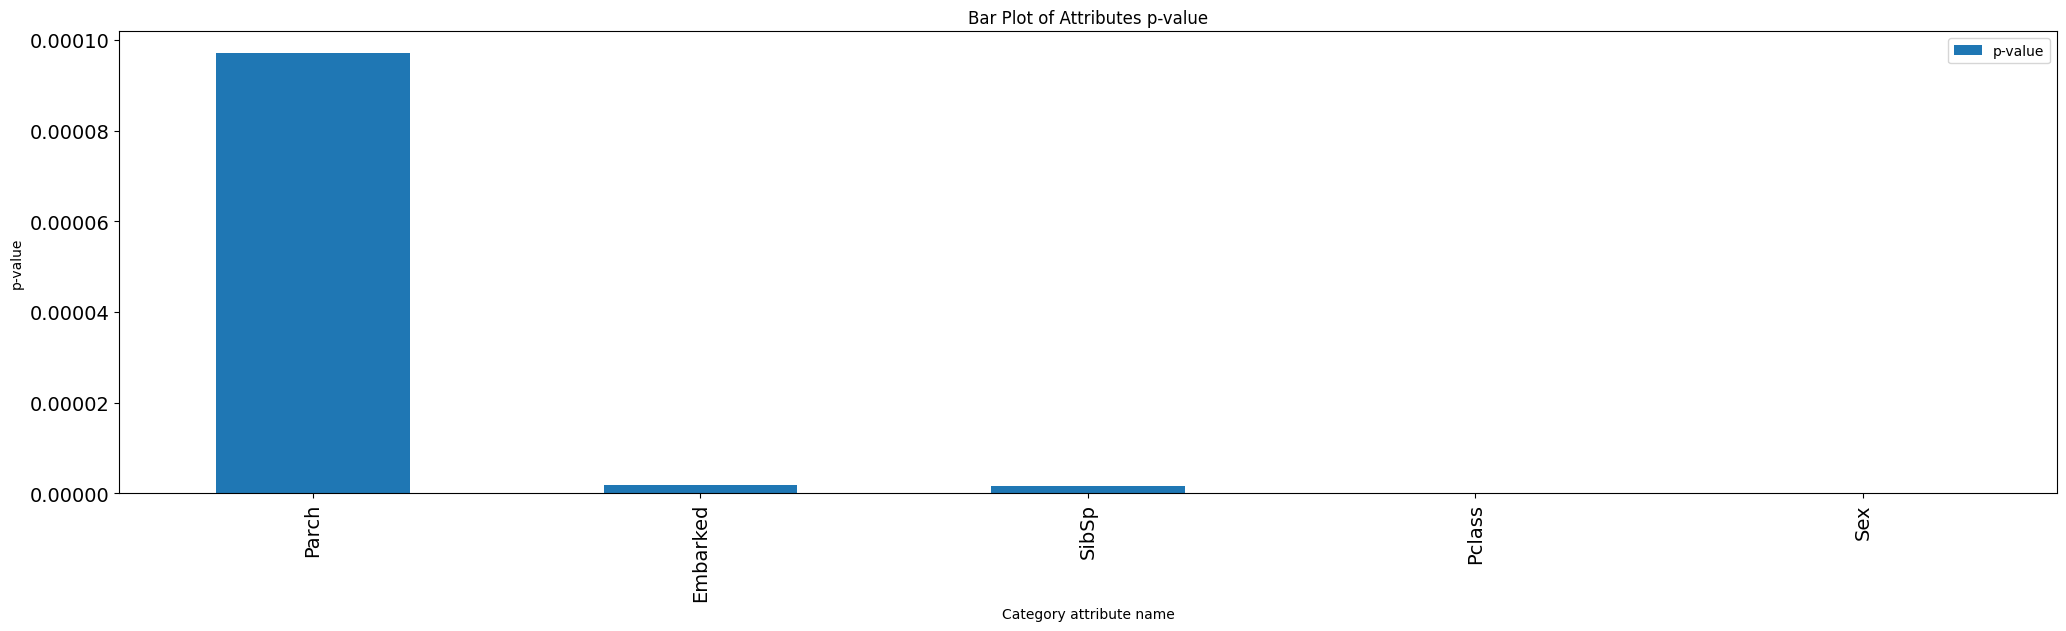

In [17]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [18]:
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [19]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
